In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from satsense import Image
from satsense.generators import FullGenerator

# URI to the image
imagefile = '../../test/data/source/section_2_sentinel_rect.tif'

# Loading the file
image = Image(imagefile, 'quickbird')
image.precompute_normalization()

print(image.shape)

(42, 147)


In [3]:
sift = cv2.xfeatures2d.SIFT_create()

array = image['gray_ubyte']
inverse_mask = (~array.mask).astype(np.uint8)

kp, des = sift.detectAndCompute(array, inverse_mask)

print(des.shape)

(120, 128)


In [4]:
img2 = np.zeros_like(image['gray_ubyte'])
img2 = cv2.drawKeypoints(image['gray_ubyte'], kp, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Window shape: [15, 15]
Generator shape: (3, 10)
[slice(0, 15, None), slice(45, 60, None)]
[slice(0, 15, None), slice(60, 75, None)]
[slice(0, 15, None), slice(75, 90, None)]
[slice(0, 15, None), slice(90, 105, None)]
[slice(0, 15, None), slice(105, 120, None)]
[slice(0, 15, None), slice(120, 135, None)]
[slice(0, 15, None), slice(135, 150, None)]
[slice(15, 30, None), slice(15, 30, None)]
[slice(15, 30, None), slice(30, 45, None)]
[slice(15, 30, None), slice(45, 60, None)]
[slice(15, 30, None), slice(60, 75, None)]
[slice(15, 30, None), slice(75, 90, None)]
[slice(15, 30, None), slice(90, 105, None)]
[slice(15, 30, None), slice(105, 120, None)]
[slice(15, 30, None), slice(120, 135, None)]
[slice(15, 30, None), slice(135, 150, None)]
[slice(30, 45, None), slice(0, 15, None)]
[slice(30, 45, None), slice(15, 30, None)]
[slice(30, 45, None), slice(30, 45, None)]
[slice(30, 45, None), slice(60, 75, None)]
[slice(30, 45, None), slice(75, 90, None)]
[slice(30, 45, None), slice(90, 105, None)]

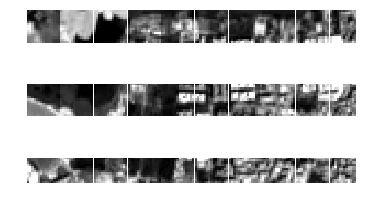

In [5]:

import matplotlib.gridspec as gridspec

window_shape = [15, 15]

print('Window shape:', window_shape)

sift2 = cv2.xfeatures2d.SIFT_create()

generator = FullGenerator(image, window_shape, with_slices=True)
generator.load_image('gray_ubyte', (window_shape, ))

gs = gridspec.GridSpec(*generator.shape)
gs.update(wspace=0.05, hspace=0.05)

print('Generator shape:', generator.shape)

descriptors = None
kps = None

for i, (img, _, slices) in enumerate(generator):
    ax = plt.subplot(gs[i])
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)
    
    array = img
    
    inverse_mask = (~array.mask).astype(np.uint8)
    kp, new_descriptors = sift2.detectAndCompute(array, inverse_mask)
    
    if kp is not None and len(kp) > 0:
        print(slices)
        
        for p in kp:
            p.pt = (p.pt[0] + slices[1].start,
                    p.pt[1] + slices[0].start)
       
        # Add descriptors if we already had some
        if descriptors is None:
            descriptors = new_descriptors
            kps = kp
        else:
            descriptors = np.append(descriptors, new_descriptors, axis=0)
            kps = np.append(kps, kp, axis=0)
    

print(descriptors.shape)

In [6]:
img3 = np.zeros_like(image['gray_ubyte'])
img3 = cv2.drawKeypoints(image['gray_ubyte'], list(kps), img3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

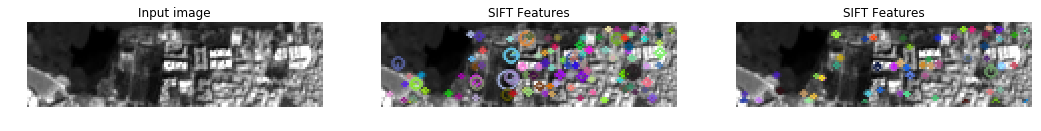

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image['gray_ubyte'], cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title('SIFT Features')

ax3.axis('off')
ax3.imshow(img3)
ax3.set_title('SIFT Features')

plt.show()

In [8]:
from satsense.features import Sift, Texton

In [9]:
s = Sift.from_images((20,20),[image])

In [10]:
s(image['gray_ubyte'])

array([0.25   , 0.03125, 0.15625, 0.21875, 0.28125, 0.125  , 0.09375,
       0.0625 , 0.1875 , 0.28125, 0.1875 , 0.15625, 0.125  , 0.125  ,
       0.03125, 0.1875 , 0.0625 , 0.09375, 0.03125, 0.0625 , 0.03125,
       0.0625 , 0.03125, 0.125  , 0.03125, 0.09375, 0.0625 , 0.09375,
       0.125  , 0.15625, 0.03125, 0.15625])

In [11]:
t = Texton.from_images((20,20), [image])

In [12]:
t(image['texton_descriptors'])

array([ 2.65625, 14.5    ,  5.15625,  4.40625,  7.625  ,  6.6875 ,
        9.03125,  7.90625,  9.59375,  5.25   ,  1.0625 ,  6.90625,
        3.53125,  1.21875, 11.65625,  3.5625 ,  5.3125 ,  4.9375 ,
       10.40625,  5.84375,  6.4375 ,  3.4375 , 15.625  ,  5.0625 ,
        6.8125 ,  1.96875,  6.75   ,  5.5625 ,  0.5625 ,  6.125  ,
        5.78125,  1.5625 ])

In [13]:
image['texton_descriptors'].shape

(42, 147, 9)

In [3]:
from satsense.generators import FullGenerator

window_shape = [5, 5]

generator = FullGenerator(image, window_shape, with_slices=True)
#generator.load_image('gray_ubyte', (window_shape, ))

generators = [g for g in generator.split(4)]

In [4]:
generator.shape

(9, 30)

In [5]:
generators[0].shape

(1, 10)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


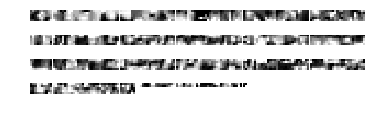

In [5]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(*generator.shape)
gs.update(wspace=0.05, hspace=0.05)

generators[0].load_image('gray_ubyte', ((15,15), ))
generators[1].load_image('gray_ubyte', ((15,15), ))
generators[2].load_image('gray_ubyte', ((15,15), ))

for i, (img,_,_) in enumerate(generators[0]):
    ax = plt.subplot(gs[i])
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)

for i, (img,_,_) in enumerate(generators[1]):
    ax = plt.subplot(gs[10+i])
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)

for i, (img,_,_) in enumerate(generators[2]):
    ax = plt.subplot(gs[20+i])
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)

In [7]:
generators[1].offset

(1, 0)

In [ ]:
import matplotlib.gridspec as gridspec
from satsense.features import HistogramOfGradients
from satsense import extract_features

window_shape = [1, 1]
window=[(3, 3)]

generator = FullGenerator(image, window_shape, with_slices=True)
generator.load_image('grayscale', window)

gs = gridspec.GridSpec(*generator.shape)
gs.update(wspace=0.05, hspace=0.05)


for i, (img,_,_) in enumerate(generator):
    ax = plt.subplot(gs[i])
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)

In [6]:
from satsense.features import HistogramOfGradients
from satsense import extract_features

window_shape = [1, 1]
window=[(15, 15)]
generator = FullGenerator(image, window_shape, with_slices=False)

features = [
    HistogramOfGradients(window)
]

feature_vector = extract_features(features, generator, n_jobs=1)

In [7]:
v = next(feature_vector)

In [8]:
m = v.vector[:, :, 0, 0]

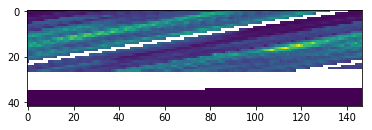

In [9]:
plt.imshow(m)

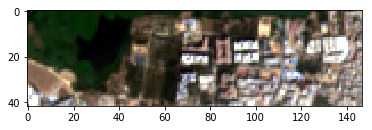

In [10]:
plt.imshow(image['rgb'])

In [53]:
stepsize = [1, 1]
windows=[(15, 15)]
generator = FullGenerator(image, stepsize, with_slices=True)
generator.load_image('grayscale', windows)

In [54]:
shape = generator.shape + (len(features[0].windows), features[0].size)

In [55]:
vector = np.ma.zeros(shape, dtype=np.float32)
vector.mask = np.zeros_like(vector, dtype=bool)

In [56]:
vector.shape

for window, slice1, slice2 in generator:
    vector[slice2[0], slice2[1], :, :] = features[0](window)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


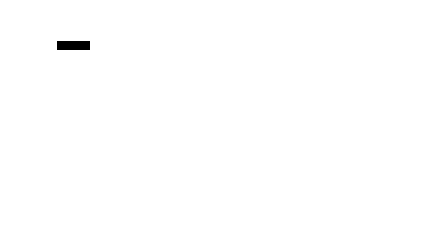

In [40]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(*generator.shape)
gs.update(wspace=0.05, hspace=0.05)

for i, (img,slice1,slice2) in enumerate(generator):
    vector[slice2[0], slice2[1], :, :] = features[0](window)
    
    ax = plt.subplot(gs[i])
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)

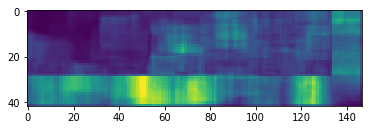

In [57]:
m = vector[:, :, 0, 0]
plt.imshow(m)